In [59]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import datetime
from datetime import datetime
import seaborn as sns
from datetime import datetime, timedelta

**Load FAANG Stock Datasets**

In [66]:
from google.colab import files
data_to_load1 = files.upload()
data_to_load2 = files.upload()
data_to_load3 = files.upload()
data_to_load4 = files.upload()
data_to_load5 = files.upload()

Saving Amazon_Historical.csv to Amazon_Historical.csv


Saving Apple_Historical.csv to Apple_Historical.csv


Saving Meta_Historical.csv to Meta_Historical.csv


Saving Google_Alphabet_Historical.csv to Google_Alphabet_Historical.csv


Saving Netflix_Historical.csv to Netflix_Historical.csv


**Read FAANG Stock Datasets in DataFrame**

In [69]:
import io
df_Amazon = pd.read_csv(io.BytesIO(data_to_load1['Amazon_Historical.csv']))
df_Apple = pd.read_csv(io.BytesIO(data_to_load2['Apple_Historical.csv']))
df_Meta = pd.read_csv(io.BytesIO(data_to_load3['Meta_Historical.csv']))
df_Google = pd.read_csv(io.BytesIO(data_to_load4['Google_Alphabet_Historical.csv']))
df_Netflix = pd.read_csv(io.BytesIO(data_to_load5['Netflix_Historical.csv']))

**Amazon Prediction**

Root mean squared difference between actual and predicted currency of 1st 180 days for Amazon is 839.5898440590785
Mean Absolute difference between actual and predicted currency of 1st 180 days for Amazon is 714.1058445866589


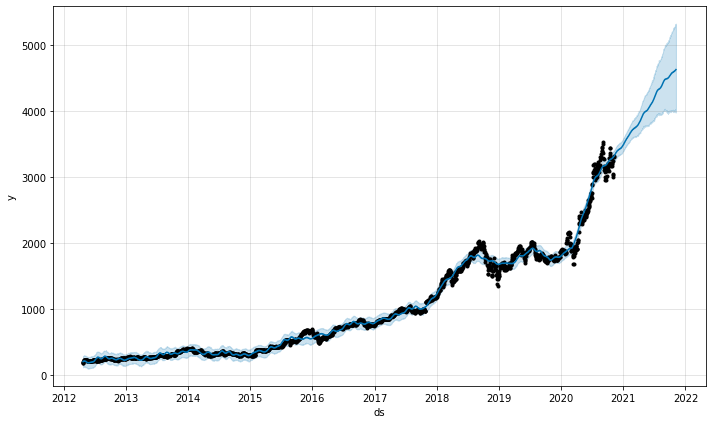

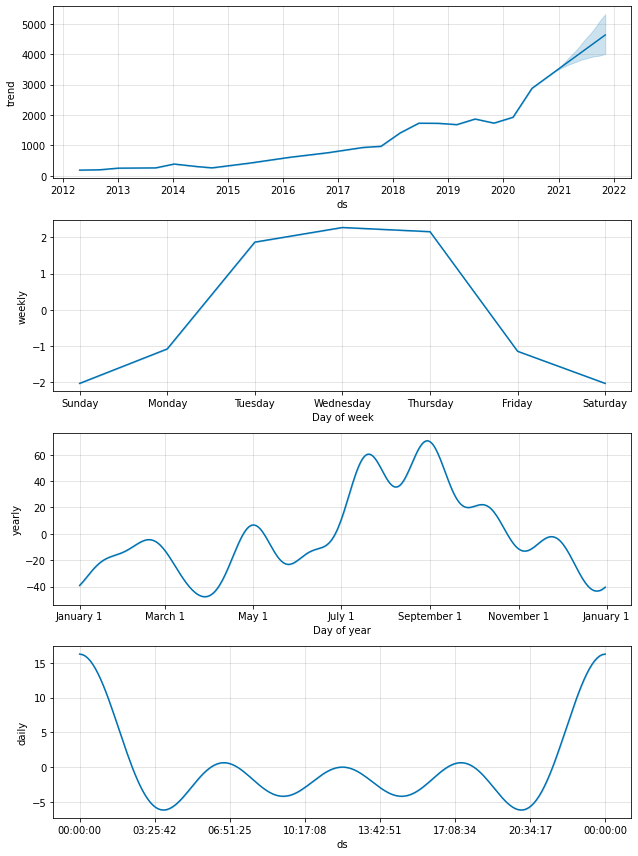

In [72]:
df_Amazon['Close/Last'] = df_Amazon['Close/Last'].replace('[\$,]', '', regex=True).astype(float)
df_Amazon['Open'] = df_Amazon['Open'].replace('[\$,]', '', regex=True).astype(float)
df_Amazon['High'] = df_Amazon['High'].replace('[\$,]', '', regex=True).astype(float)
df_Amazon['Low'] = df_Amazon['Low'].replace('[\$,]', '', regex=True).astype(float)
df_Amazon['Date']=pd.to_datetime(df_Amazon['Date'],errors='coerce')
df_Amazon = df_Amazon.sort_values(by="Date")
data_Amazon=df_Amazon[['Date','Close/Last']]
data_Amazon = data_Amazon.rename(columns={'Date': 'ds','Close/Last':'y'})
from sklearn.model_selection import train_test_split
data_Amazon_train,data_Amazon_test = train_test_split(data_Amazon, test_size=365/data_Amazon.shape[0],shuffle=False)
m_Amazon = Prophet(changepoint_prior_scale=0.1,changepoint_range = 1,daily_seasonality=True)
m_Amazon.fit(data_Amazon_train)
future = m_Amazon.make_future_dataframe(periods=365)
forecast = m_Amazon.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
fig1 = m_Amazon.plot(forecast)
fig2 = m_Amazon.plot_components(forecast)
result1=forecast.tail(365)[['ds','yhat']]
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt
rms = sqrt(mean_squared_error(data_Amazon_test['y'],result1.yhat))
ma =mean_absolute_error(data_Amazon_test['y'],result1.yhat)
print("Root mean squared difference between actual and predicted currency of 365 days for Amazon is",rms)
print("Mean Absolute difference between actual and predicted currency of 365 days for Amazon is",ma)
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=data_Amazon.ds, y=data_Amazon['y'], name="Actual Value",
                         line_color='deepskyblue'))
fig.add_trace(go.Scatter(x=data_Amazon_test.ds, y=result1.yhat, name="Predicted Value",
                         line_color='dimgray'))
fig.update_layout(title_text='Amazon Prophet Forecasting',
                  xaxis_rangeslider_visible=True)
fig.show()

**Apple Forecasting**

Root mean squared difference between actual and predicted currency of 1st 180 days for Apple is 23.04951326625103
Mean Absolute difference between actual and predicted currency of 1st 180 days for Apple is 20.39676027009685


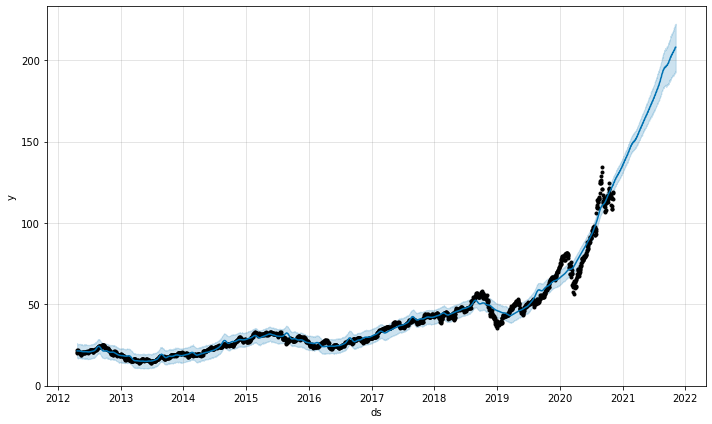

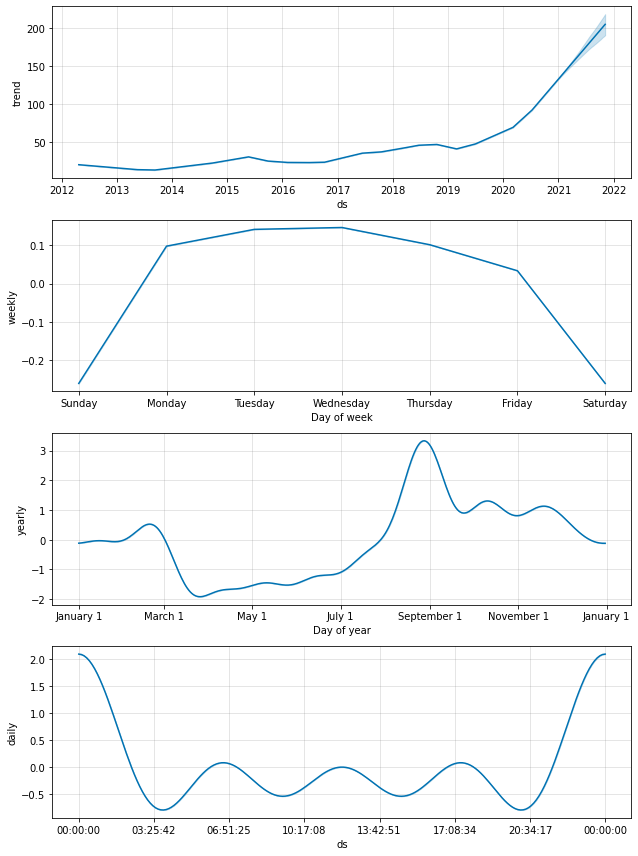

In [73]:
df_Apple['Close/Last'] = df_Apple['Close/Last'].replace('[\$,]', '', regex=True).astype(float)
df_Apple['Open'] = df_Apple['Open'].replace('[\$,]', '', regex=True).astype(float)
df_Apple['High'] = df_Apple['High'].replace('[\$,]', '', regex=True).astype(float)
df_Apple['Low'] = df_Apple['Low'].replace('[\$,]', '', regex=True).astype(float)
df_Apple['Date']=pd.to_datetime(df_Apple['Date'],errors='coerce')
df_Apple = df_Apple.sort_values(by="Date")
data_Apple=df_Apple[['Date','Close/Last']]
data_Apple = data_Apple.rename(columns={'Date': 'ds','Close/Last':'y'})
from sklearn.model_selection import train_test_split
data_Apple_train,data_Apple_test = train_test_split(data_Apple, test_size=365/data_Apple.shape[0],shuffle=False)
m_Apple = Prophet(changepoint_prior_scale=0.1,changepoint_range = 1,daily_seasonality=True)
m_Apple.fit(data_Apple_train)
future = m_Apple.make_future_dataframe(periods=365)
forecast = m_Apple.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
fig1 = m_Apple.plot(forecast)
fig2 = m_Apple.plot_components(forecast)
result1=forecast.tail(365)[['ds','yhat']]
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt
rms = sqrt(mean_squared_error(data_Apple_test['y'],result1.yhat))
ma =mean_absolute_error(data_Apple_test['y'],result1.yhat)
print("Root mean squared difference between actual and predicted currency of 365 days for Apple is",rms)
print("Mean Absolute difference between actual and predicted currency of 1st 365 days for Apple is",ma)
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=data_Apple.ds, y=data_Apple['y'], name="Actual Value",
                         line_color='deepskyblue'))
fig.add_trace(go.Scatter(x=data_Apple_test.ds, y=result1.yhat, name="Predicted Value",
                         line_color='dimgray'))
fig.update_layout(title_text='Apple Prophet Forecasting',
                  xaxis_rangeslider_visible=True)
fig.show()

**Meta Forecasting**

Root mean squared difference between actual and predicted currency of 365 days for Meta is 83.21756751895873
Mean Absolute difference between actual and predicted currency of 365 days for Meta is 54.25672674675998


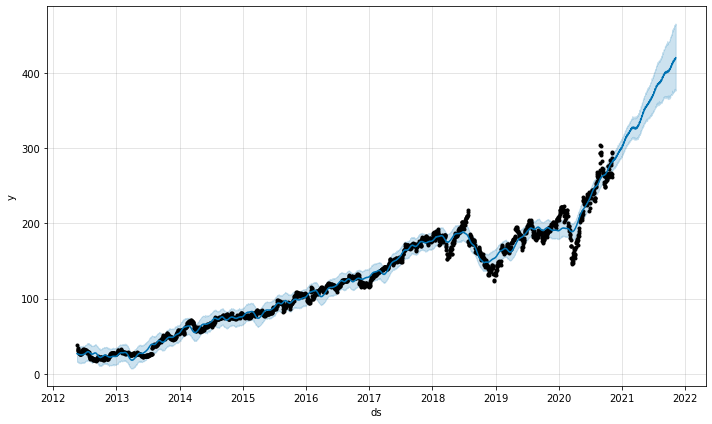

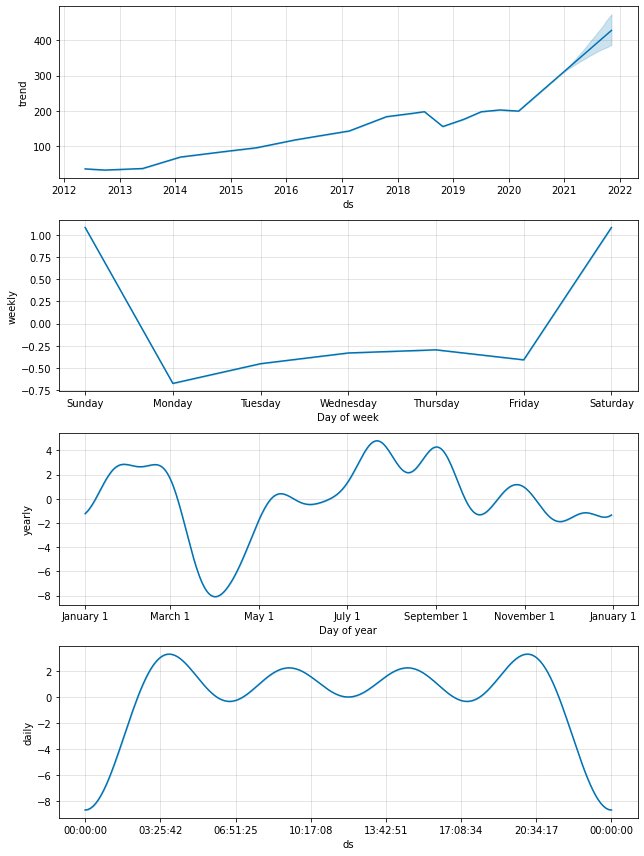

In [74]:
df_Meta['Close/Last'] = df_Meta['Close/Last'].replace('[\$,]', '', regex=True).astype(float)
df_Meta['Open'] = df_Meta['Open'].replace('[\$,]', '', regex=True).astype(float)
df_Meta['High'] = df_Meta['High'].replace('[\$,]', '', regex=True).astype(float)
df_Meta['Low'] = df_Meta['Low'].replace('[\$,]', '', regex=True).astype(float)
df_Meta['Date']=pd.to_datetime(df_Meta['Date'],errors='coerce')
df_Meta = df_Meta.sort_values(by="Date")
data_Meta=df_Meta[['Date','Close/Last']]
data_Meta = data_Meta.rename(columns={'Date': 'ds','Close/Last':'y'})
from sklearn.model_selection import train_test_split
data_Meta_train,data_Meta_test = train_test_split(data_Meta, test_size=365/data_Meta.shape[0],shuffle=False)
m_Meta = Prophet(changepoint_prior_scale=0.1,changepoint_range = 1,daily_seasonality=True)
m_Meta.fit(data_Meta_train)
future = m_Meta.make_future_dataframe(periods=365)
forecast = m_Meta.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
fig1 = m_Meta.plot(forecast)
fig2 = m_Meta.plot_components(forecast)
result1=forecast.tail(365)[['ds','yhat']]
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt
rms = sqrt(mean_squared_error(data_Meta_test['y'],result1.yhat))
ma =mean_absolute_error(data_Meta_test['y'],result1.yhat)
print("Root mean squared difference between actual and predicted currency of 365 days for Meta is",rms)
print("Mean Absolute difference between actual and predicted currency of 365 days for Meta is",ma)
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=data_Meta.ds, y=data_Meta['y'], name="Actual Value",
                         line_color='deepskyblue'))
fig.add_trace(go.Scatter(x=data_Meta_test.ds, y=result1.yhat, name="Predicted Value",
                         line_color='dimgray'))
fig.update_layout(title_text='Meta Prophet Forecasting',
                  xaxis_rangeslider_visible=True)
fig.show()

**Google Prediction**

Root mean squared difference between actual and predicted currency of 365 days for Google is 729.449751959733
Mean Absolute difference between actual and predicted currency of 365 days for Google is 661.8963368065694


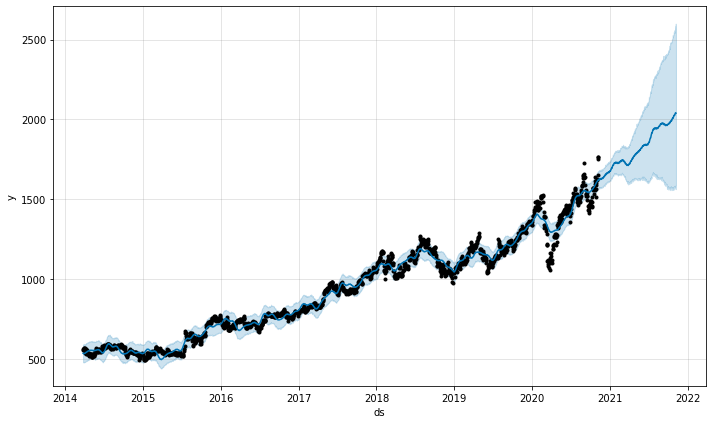

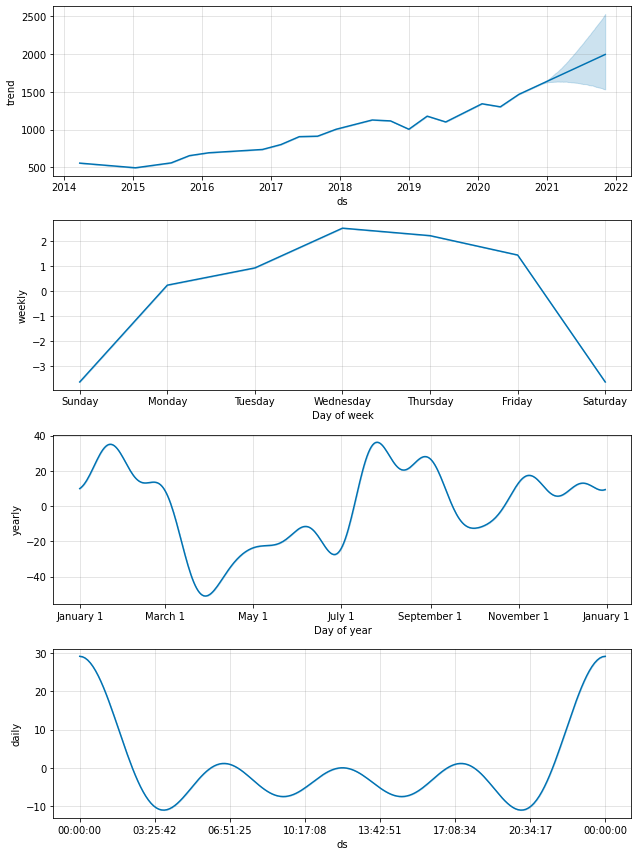

In [75]:
df_Google['Close/Last'] = df_Google['Close/Last'].replace('[\$,]', '', regex=True).astype(float)
df_Google['Open'] = df_Google['Open'].replace('[\$,]', '', regex=True).astype(float)
df_Google['High'] = df_Google['High'].replace('[\$,]', '', regex=True).astype(float)
df_Google['Low'] = df_Google['Low'].replace('[\$,]', '', regex=True).astype(float)
df_Google['Date']=pd.to_datetime(df_Google['Date'],errors='coerce')
df_Google = df_Google.sort_values(by="Date")
data_Google=df_Google[['Date','Close/Last']]
data_Google = data_Google.rename(columns={'Date': 'ds','Close/Last':'y'})
from sklearn.model_selection import train_test_split
data_Google_train,data_Google_test = train_test_split(data_Google, test_size=365/data_Google.shape[0],shuffle=False)
m_Google = Prophet(changepoint_prior_scale=0.1,changepoint_range = 1,daily_seasonality=True)
m_Google.fit(data_Google_train)
future = m_Google.make_future_dataframe(periods=365)
forecast = m_Google.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
fig1 = m_Google.plot(forecast)
fig2 = m_Google.plot_components(forecast)
result1=forecast.tail(365)[['ds','yhat']]
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt
rms = sqrt(mean_squared_error(data_Google_test['y'],result1.yhat))
ma =mean_absolute_error(data_Google_test['y'],result1.yhat)
print("Root mean squared difference between actual and predicted currency of 365 days for Google is",rms)
print("Mean Absolute difference between actual and predicted currency of 365 days for Google is",ma)
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=data_Google.ds, y=data_Google['y'], name="Actual Value",
                         line_color='deepskyblue'))
fig.add_trace(go.Scatter(x=data_Google_test.ds, y=result1.yhat, name="Predicted Value",
                         line_color='dimgray'))
fig.update_layout(title_text='Google Prophet Forecasting',
                  xaxis_rangeslider_visible=True)
fig.show()

**Netflix Prediction**

Root mean squared difference between actual and predicted currency of 365 days for Netflix is 147.19132491447087
Mean Absolute difference between actual and predicted currency of 365 days for Netflix is 101.24952449324593


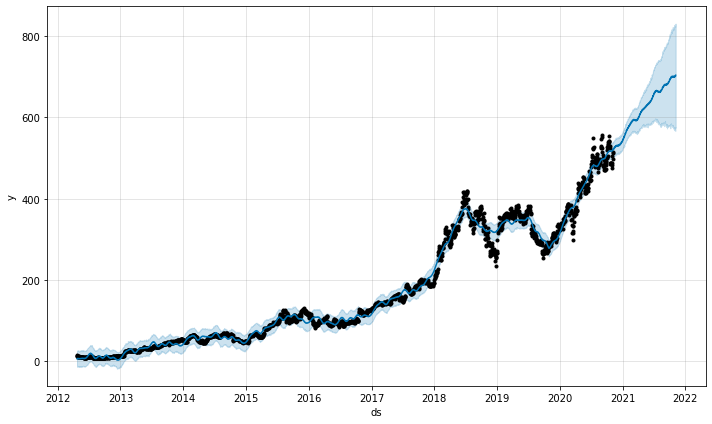

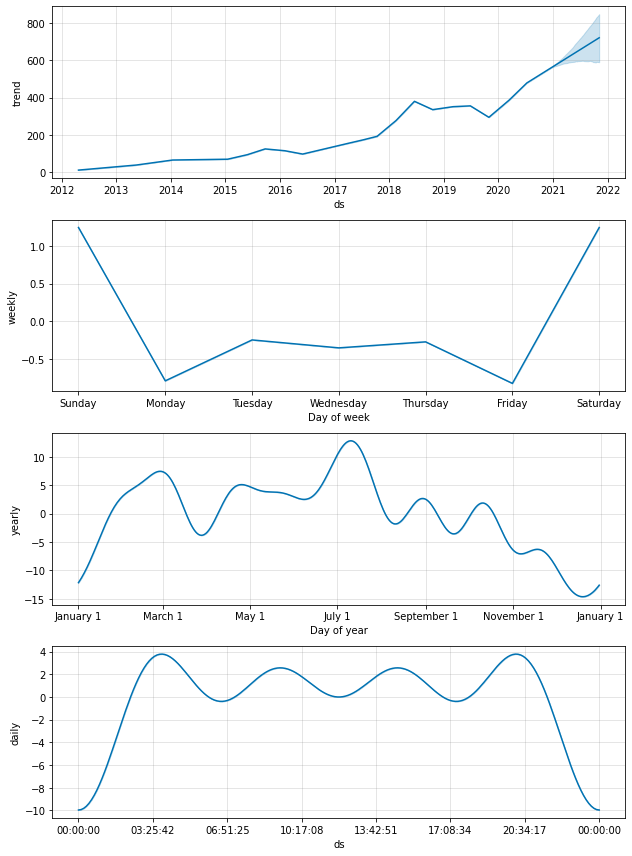

In [76]:
df_Netflix['Close/Last'] = df_Netflix['Close/Last'].replace('[\$,]', '', regex=True).astype(float)
df_Netflix['Open'] = df_Netflix['Open'].replace('[\$,]', '', regex=True).astype(float)
df_Netflix['High'] = df_Netflix['High'].replace('[\$,]', '', regex=True).astype(float)
df_Netflix['Low'] = df_Netflix['Low'].replace('[\$,]', '', regex=True).astype(float)
df_Netflix['Date']=pd.to_datetime(df_Netflix['Date'],errors='coerce')
df_Netflix = df_Netflix.sort_values(by="Date")
data_Netflix=df_Netflix[['Date','Close/Last']]
data_Netflix = data_Netflix.rename(columns={'Date': 'ds','Close/Last':'y'})
from sklearn.model_selection import train_test_split
data_Netflix_train,data_Netflix_test = train_test_split(data_Netflix, test_size=365/data_Netflix.shape[0],shuffle=False)
m_Netflix = Prophet(changepoint_prior_scale=0.1,changepoint_range = 1,daily_seasonality=True)
m_Netflix.fit(data_Netflix_train)
future = m_Netflix.make_future_dataframe(periods=365)
forecast = m_Netflix.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
fig1 = m_Netflix.plot(forecast)
fig2 = m_Netflix.plot_components(forecast)
result1=forecast.tail(365)[['ds','yhat']]
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt
rms = sqrt(mean_squared_error(data_Netflix_test['y'],result1.yhat))
ma =mean_absolute_error(data_Netflix_test['y'],result1.yhat)
print("Root mean squared difference between actual and predicted currency of 365 days for Netflix is",rms)
print("Mean Absolute difference between actual and predicted currency of 365 days for Netflix is",ma)
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=data_Netflix.ds, y=data_Netflix['y'], name="Actual Value",
                         line_color='deepskyblue'))
fig.add_trace(go.Scatter(x=data_Netflix_test.ds, y=result1.yhat, name="Predicted Value",
                         line_color='dimgray'))
fig.update_layout(title_text='Netflix Prophet Forecasting',
                  xaxis_rangeslider_visible=True)
fig.show()